<a href="https://colab.research.google.com/github/GeorgeVieiraNRB/Fruits-Classifier/blob/Lucas-Henrique/classificador_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GERENCIAR BIBLIOTECAS

## INSTALAR BIBLIOTECAS

In [1]:
!pip install gdown

## IMPORTS

In [2]:
# UPLOAD DO BANCO DE DADOS
import gdown
import zipfile
import os
# VISUALIZAR DADOS
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib
# REDE NEURAL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

# COLETA DE DADOS

In [3]:
# Crie o link de download para o arquivo zip da pasta
link_download_zip = "https://drive.google.com/u/0/uc?id=1x9xLSnxdIzRH6rLDROZhQFg1E-fvJODS&export=download"

# Defina o nome do arquivo zip a ser baixado
nome_arquivo_zip = "frutas.zip"

# Faça o download do arquivo zip da pasta do Google Drive
gdown.download(link_download_zip, nome_arquivo_zip, quiet=False)

# Extrair o conteúdo do arquivo zip para a pasta de destino no Colab
caminho_destino = "/content/frutas"
with zipfile.ZipFile(nome_arquivo_zip, "r") as zip_ref:
    zip_ref.extractall(caminho_destino)

# Verifique o conteúdo da pasta após a extração
conteudo_destino = os.listdir(caminho_destino)
print("Conteúdo da pasta de destino:", conteudo_destino)

Downloading...
From: https://drive.google.com/u/0/uc?id=1x9xLSnxdIzRH6rLDROZhQFg1E-fvJODS&export=download
To: /content/frutas.zip
100%|██████████| 633M/633M [00:03<00:00, 201MB/s]


Conteúdo da pasta de destino: ['limao-tahiti', 'kiwi', 'maca', 'pera', 'limao-siciliano']


# CLASSIFICAR IMAGENS EM TREINO E TESTE

## EXPLORAR IMAGENS

In [4]:
data_dir = pathlib.Path(caminho_destino).with_suffix('')
image_count = len(list(data_dir.glob('*/*.[jpg]*[jpeg]*')))
print("Total de Imagens:", image_count)

Total de Imagens: 215


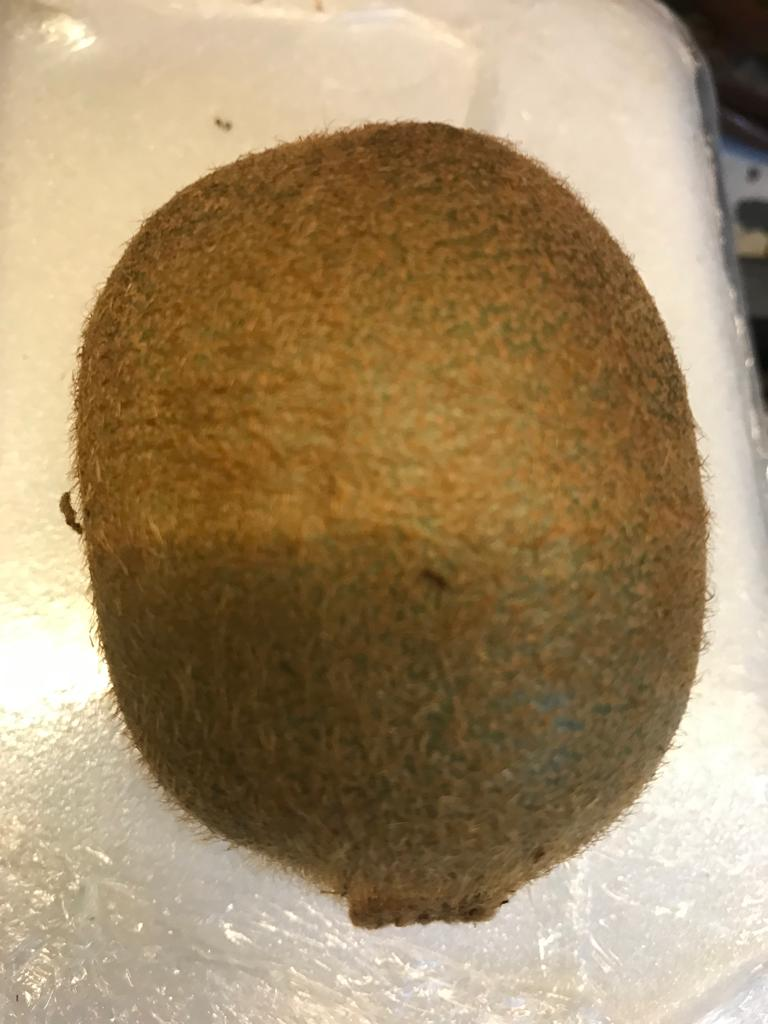

In [5]:
pera = list(data_dir.glob('kiwi/*'))
PIL.Image.open(str(pera[0]))

## DEFINIR IMAGENS DE TREINO E TESTE

In [6]:
# TREINO: 80%
# TESTE:  20%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123)

Found 215 files belonging to 5 classes.
Using 172 files for training.


In [7]:
# TREINO: 80%
# TESTE:  20%
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123)

Found 215 files belonging to 5 classes.
Using 43 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['kiwi', 'limao-siciliano', 'limao-tahiti', 'maca', 'pera']


## VISUALIZAR IMAGENS

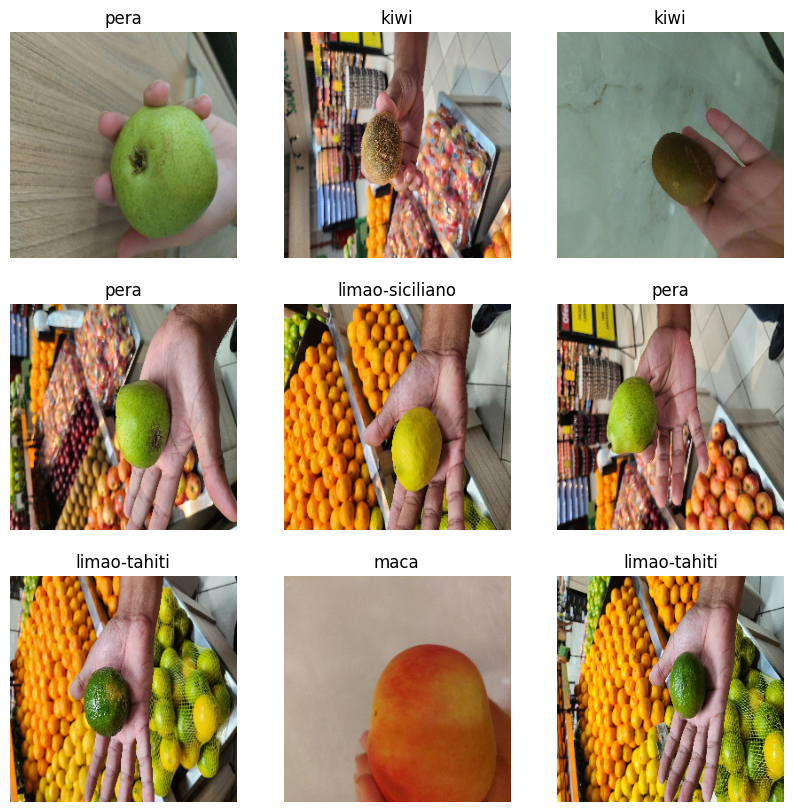

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


## INVESTIGAR DADOS

In [11]:
# Inicialize as listas vazias para armazenar os dados
images_list = []
labels_list = []

# Itere sobre os lotes do _BatchDataset e armazene os dados em listas
for images_batch, labels_batch in train_ds:
    images_list.append(images_batch.numpy())
    labels_list.append(labels_batch.numpy())

# Combine os arrays em um único array usando numpy.concatenate()
images_np = np.concatenate(images_list, axis=0)
labels_np = np.concatenate(labels_list, axis=0)

In [12]:
print(f"{'-='*30}\nImagem: {images_np[0]}")
print(f"{'-='*30}\nLabel: {labels_np[0]}")

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Imagem: [[[165.3562   161.3562   149.3562  ]
  [159.91748  155.91748  143.91748 ]
  [169.69507  163.69507  149.69507 ]
  ...
  [141.66455  142.66455  134.66455 ]
  [143.41138  144.41138  136.41138 ]
  [148.80933  149.80933  141.80933 ]]

 [[163.85327  159.85327  147.85327 ]
  [165.99219  161.99219  149.99219 ]
  [166.02051  160.02051  146.02051 ]
  ...
  [144.76416  147.76416  140.76416 ]
  [143.9585   144.9585   136.9585  ]
  [146.33691  147.33691  139.33691 ]]

 [[166.32007  162.32007  150.32007 ]
  [165.32886  161.32886  149.32886 ]
  [162.5481   158.5481   146.5481  ]
  ...
  [139.61304  142.61304  135.61304 ]
  [144.10156  145.10156  137.10156 ]
  [145.99194  146.99194  138.99194 ]]

 ...

 [[149.07007  143.07007  121.07007 ]
  [148.06104  142.06104  120.061035]
  [147.07983  141.07983  119.079834]
  ...
  [118.09131   68.09131   33.09131 ]
  [118.630615  65.630615  34.630615]
  [120.0791    71.34473   33.711914]]

 [[15

In [13]:
print(f"Range imagens: [{images_np.min()}, {images_np.max()}]")
print(f"Labels: {np.unique(labels_np)}")

Range imagens: [0.0, 255.0]
Labels: [0 1 2 3 4]


## NORMALIZAR DADOS

In [14]:
images_norm = images_np / 255.0

In [15]:
print(f"{'-='*30}\nImagem Normalizada: {images_norm[0]}\n{'-='*30}")
print(f"Range imagens: [{images_norm.min()}, {images_norm.max()}]")

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Imagem Normalizada: [[[0.6484557  0.6327694  0.5857106 ]
  [0.62712735 0.6114411  0.56438226]
  [0.66547084 0.6419414  0.5870395 ]
  ...
  [0.55554724 0.5594688  0.52809626]
  [0.56239754 0.5663191  0.53494656]
  [0.583566   0.5874876  0.55611503]]

 [[0.64256185 0.6268756  0.57981676]
  [0.6509498  0.6352635  0.5882047 ]
  [0.6510608  0.6275314  0.57262945]
  ...
  [0.5677026  0.5794673  0.5520163 ]
  [0.5645431  0.5684647  0.53709215]
  [0.57387024 0.5777918  0.54641926]]

 [[0.65223557 0.6365493  0.5894905 ]
  [0.64834845 0.6326622  0.58560336]
  [0.6374435  0.6217572  0.5746984 ]
  ...
  [0.5475021  0.5592668  0.5318158 ]
  [0.5651042  0.56902575 0.5376532 ]
  [0.57251745 0.576439   0.5450664 ]]

 ...

 [[0.5845885  0.5610591  0.47478458]
  [0.5806315  0.5571021  0.47082758]
  [0.57678366 0.55325425 0.46697974]
  ...
  [0.46310318 0.26702473 0.12976983]
  [0.4652181  0.25737497 0.13580634]
  [0.47089845 0.27978325 0.13220

# CRIAR MODELO

In [16]:
num_classes = len(class_names)

model = Sequential([
  # NORMALIZAR IMAGENS
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  # EXTRAIR CARACTERISTICAS
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # REDUZIR DIMENSAO DOS DADOS (1 X N)
  layers.Flatten(),
  # CAMADA ESCONDIDA
  layers.Dense(256, activation='relu'),
  # SAIDA
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [19]:
epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 37s 3s/step - loss: 3.8722 - accuracy: 0.2384 - val_loss: 1.8353 - val_accuracy: 0.0930
Epoch 2/10
6/6 [==============================] - 34s 3s/step - loss: 1.4490 - accuracy: 0.3314 - val_loss: 1.1016 - val_accuracy: 0.5814
Epoch 3/10
6/6 [==============================] - 39s 4s/step - loss: 1.0737 - accuracy: 0.5349 - val_loss: 0.9287 - val_accuracy: 0.6279
Epoch 4/10
6/6 [==============================] - 34s 3s/step - loss: 0.8041 - accuracy: 0.7151 - val_loss: 0.8071 - val_accuracy: 0.6512
Epoch 5/10
6/6 [==============================] - 34s 3s/step - loss: 0.5813 - accuracy: 0.7733 - val_loss: 0.6119 - val_accuracy: 0.7674
Epoch 6/10
6/6 [==============================] - 33s 3s/step - loss: 0.3900 - accuracy: 0.8721 - val_loss: 0.7312 - val_accuracy: 0.6977
Epoch 7/10
6/6 [==============================] - 38s 4s/step - loss: 0.2653 - accuracy: 0.9070 - val_loss: 0.6623 - val_accuracy: 0.7907
Epoch 8/10
6/6 [==================

# VISUALIZAR RESULTADOS

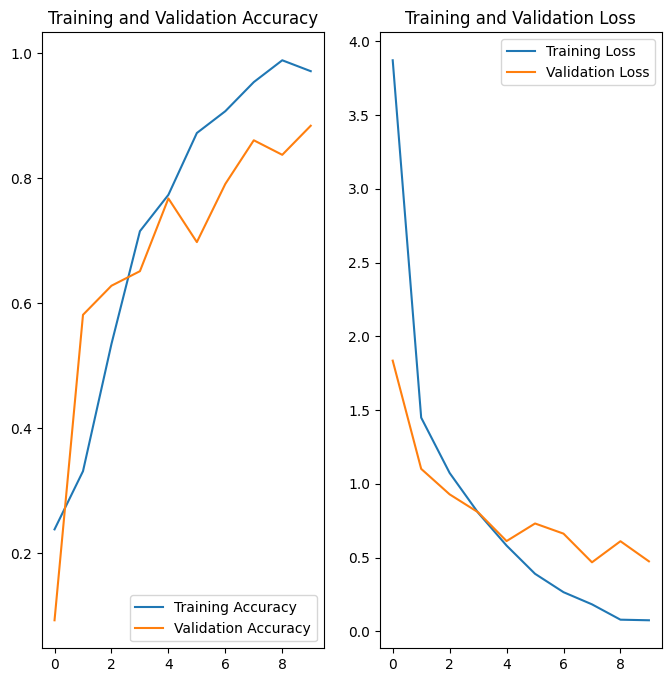

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
model.evaluate(val_ds)

2/2 [==============================] - 4s 233ms/step - loss: 0.4745 - accuracy: 0.8837


[0.4744932949542999, 0.8837209343910217]

# PREDIÇÃO DE IMAGENS

## DOWNLOAD DAS IMAGENS

In [28]:
# Crie o link de download para o arquivo zip da pasta
link_download_zip = "https://drive.google.com/uc?export=download&id=1kK_on4nKC7JsA3ZRHTf98wPjFkCasLqi"

# Defina o nome do arquivo zip a ser baixado
nome_arquivo_zip = "prever_frutas.zip"

# Faça o download do arquivo zip da pasta do Google Drive
gdown.download(link_download_zip, nome_arquivo_zip, quiet=False)

# Extrair o conteúdo do arquivo zip para a pasta de destino no Colab
caminho_destino = "/content/prever_frutas"
with zipfile.ZipFile(nome_arquivo_zip, "r") as zip_ref:
    zip_ref.extractall(caminho_destino)

# Verifique o conteúdo da pasta após a extração
conteudo_destino = os.listdir(caminho_destino)
print("\nConteúdo da pasta de destino:", conteudo_destino)

Downloading...
From: https://drive.google.com/uc?export=download&id=1kK_on4nKC7JsA3ZRHTf98wPjFkCasLqi
To: /content/prever_frutas.zip
100%|██████████| 713k/713k [00:00<00:00, 125MB/s]


Conteúdo da pasta de destino: ['limao-siciliano_cortado.jpg', 'maca_cortada.jpeg', 'limao-tahiti_cortado.jpg', 'maca.jpg', 'kiwi.jpg', 'maca.jpeg', 'pera.jpg', 'limao-siciliano.jpg', 'limao-tahiti.jpg', 'pera_cortada.jpg', 'kiwi_cortado.jpg']


## PREVER FRUTA

In [34]:
fruta_path = f"{caminho_destino}/kiwi.jpg"

img = tf.keras.utils.load_img(fruta_path, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 103ms/step
This image most likely belongs to kiwi with a 80.62 percent confidence.


# REFERÊNCIAS

- https://towardsdatascience.com/building-a-convolutional-neural-network-from-scratch-using-numpy-a22808a00a40
- https://www.tensorflow.org/tutorials/
- https://www.tensorflow.org/tutorials/images/classification